In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [5]:
# read in original transcript data
transcripts = pd.read_csv('EarningsTranscriptData.txt')
# calculate the number of words
transcripts['word_count_full'] = transcripts.content.apply(lambda s: len(s.split()))

# read in gpt summaries of transcripts
summaries = pd.read_csv('gpt_summaries.csv')
# calculate the number of words
summaries['word_count_summary'] = summaries.response.apply(lambda s: len(s.split()))
summary_word_counts = summaries.groupby(['symbol', 'year', 'quarter']).agg(np.sum).reset_index()[['symbol','year','quarter','word_count_summary']]


In [33]:
# merge the two dfs to calculate the leverage gained from using summaries instead of reading the text yourself
comparison = pd.merge(transcripts[['symbol','year','quarter', 'date', 'word_count_full']], summary_word_counts, 'left', left_on=['symbol', 'quarter', 'year'], right_on=['symbol', 'quarter', 'year'])
comparison['summary_leverage'] = comparison.word_count_full / comparison.word_count_summary

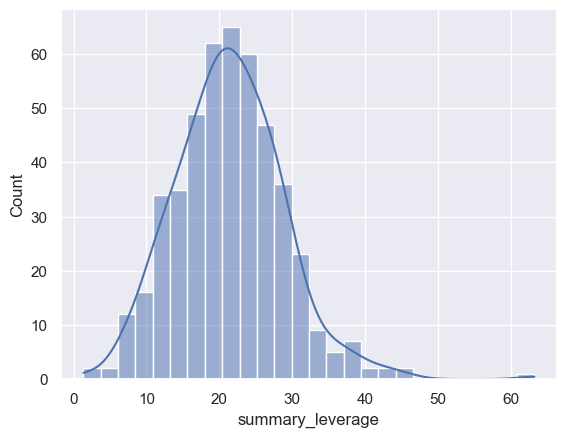

In [46]:
# histogram of leverage
sns.histplot(comparison, x='summary_leverage', kde=True);

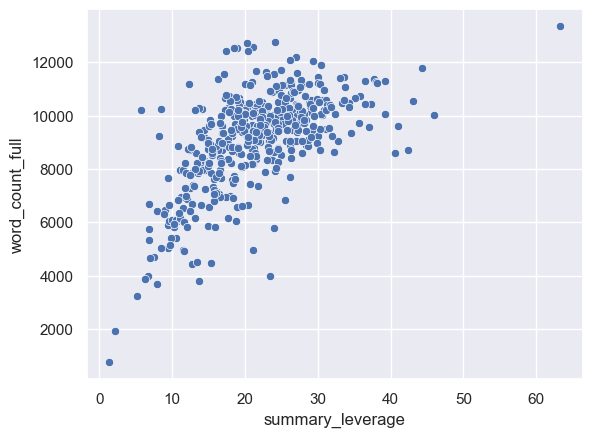

In [48]:
# scatter plot between starting number of words and amount of leverage gained
sns.scatterplot(comparison, x='summary_leverage', y='word_count_full');